# Default Setup

In [7]:
# Dataloading Stuff
from google.colab import drive
from sys import path
import os

# Standard Stuff
!pip3 install numpy sklearn iterative-stratification pandas pyss3 nltk

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import download
nltk.download('punkt')
from sklearn.model_selection import train_test_split

from pyss3 import SS3
from pyss3.util import Dataset, Evaluation, span

import numpy as np
import pandas as pd

drive.mount('/content/drive', force_remount=True)
path_root = '/content/drive/My Drive/NLP Lab/SingleLabel/'
path.append(path_root)
data_root = 'data/'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/lib/python3.6/threading.py:868: ResourceWarning: unclosed file <_io.FileIO name=61 mode='wb' closefd=True>
  del self._target, self._args, self._kwargs
/usr/lib/python3.6/threading.py:868: ResourceWarning: unclosed file <_io.FileIO name=69 mode='rb' closefd=True>
  del self._target, self._args, self._kwargs


Mounted at /content/drive


## Classifier with 2 Classes (Dataset only provides two classes)

Classification: 100%|██████████| 9693/9693 [00:00<00:00, 27914.72it/s]



              precision    recall  f1-score   support

    negative       0.81      0.85      0.83      4828
    positive       0.85      0.80      0.82      4865

    accuracy                           0.83      9693
   macro avg       0.83      0.83      0.83      9693
weighted avg       0.83      0.83      0.83      9693


 Accuracy: 0.828

[ updating evaluations cache ]


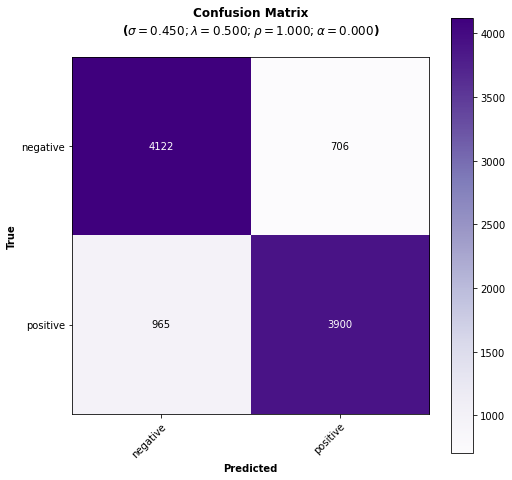

0.8275170753750879

In [2]:
df = pd.read_csv(path_root + data_root + "IMDBReviews/IMDB Dataset.csv", sep=";")
df['review'].replace({'<br />': '\\n'}, inplace=True, regex=True)
df.dropna(inplace=True)
text = df['review'].to_list()
labels = df['sentiment'].to_list()
X_train, X_val, y_train, y_val = train_test_split(text, labels, test_size=0.2)

clf = SS3()
clf.fit(X_train, y_train)
Evaluation.test(clf, X_val, y_val, metric="f1-score")

## Calculate average number of sentences per sample

In [8]:
def avg_sent_number(samples, labels, target):
  sentence_number = 0
  for index in range(len(samples)):
    if labels[index] == target:
      sentence_number += len(sent_tokenize(samples[index]))
  return sentence_number/len(samples)

target = 'positive'
avg_size = avg_sent_number(X_train, y_train, target)
print('Average Number of sentences in sample for class {}:'.format(target), avg_size)

target = 'negative'
avg_size = avg_sent_number(X_train, y_train, target)
print('Average Number of sentences in sample for class {}:'.format(target), avg_size)

Average Number of sentences in sample for class positive: 6.069693061645602
Average Number of sentences in sample for class negative: 6.41957699251999


## Calculate average number of paragraph per sample

In [10]:
def avg_para_number(samples, labels, target):
  para_number = 0
  for index in range(len(samples)):
    if labels[index] == target:
      para_number += len(samples[index].split('\n'))
  return para_number/len(samples)

target = 'positive'
avg_size = avg_para_number(X_train, y_train, target)
print('Average Number of paragraphs in sample for class {}:'.format(target), avg_size)

target = 'negative'
avg_size = avg_para_number(X_train, y_train, target)
print('Average Number of paragraphs in sample for class {}:'.format(target), avg_size)

Average Number of paragraphs in sample for class positive: 2.4981686871292235
Average Number of paragraphs in sample for class negative: 2.621356719112716
